In [3]:
'''
Date: 2022.05.30
Title: 
By: Kang Jin Seong
'''

# 패션 MNIST 데이터 불러오기
# 완전 연결 신경망에서는 입력 이미지를 밀집츠에 연결하기 위해 일렬로 펼쳐야 한다.
# reshape()를 사용하거나 Flatten 클래스를 사용
# 합성곱 신경망은 2차원 이미지를 그대로 사용하기 때문에 일렬로 펼치지 않는다.
#(48000,28,28) 크기인 train_input이 (48000,28,28,1) 크기인 train_scaled가 되었다.

from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1,28,28,1)/255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
#합성곱 신경망 만들기
model = keras.Sequential()
# 합성곱층은 32개의 필터 사용
# 커널의 크기는 (3,3)이고 렐루 활성화 함수와 세임 패딩을 사용
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (28,28,1)))

# 풀링 층을 추가
# Conv2D 클래스의 kernel_size처럼 가로,세로 크기가 같으면 정수 하나로 지정
model.add(keras.layers.MaxPooling2D(2))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 두 번째 합성곱 - 폴링 층을 추가
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (28,28,1)))
model.add(keras.layers.MaxPooling2D(2))

In [9]:

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

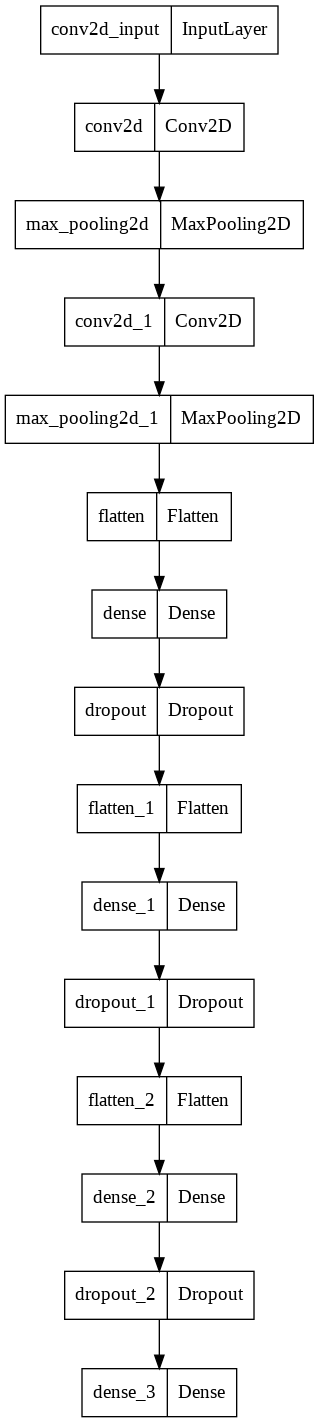

In [10]:
keras.utils.plot_model(model)

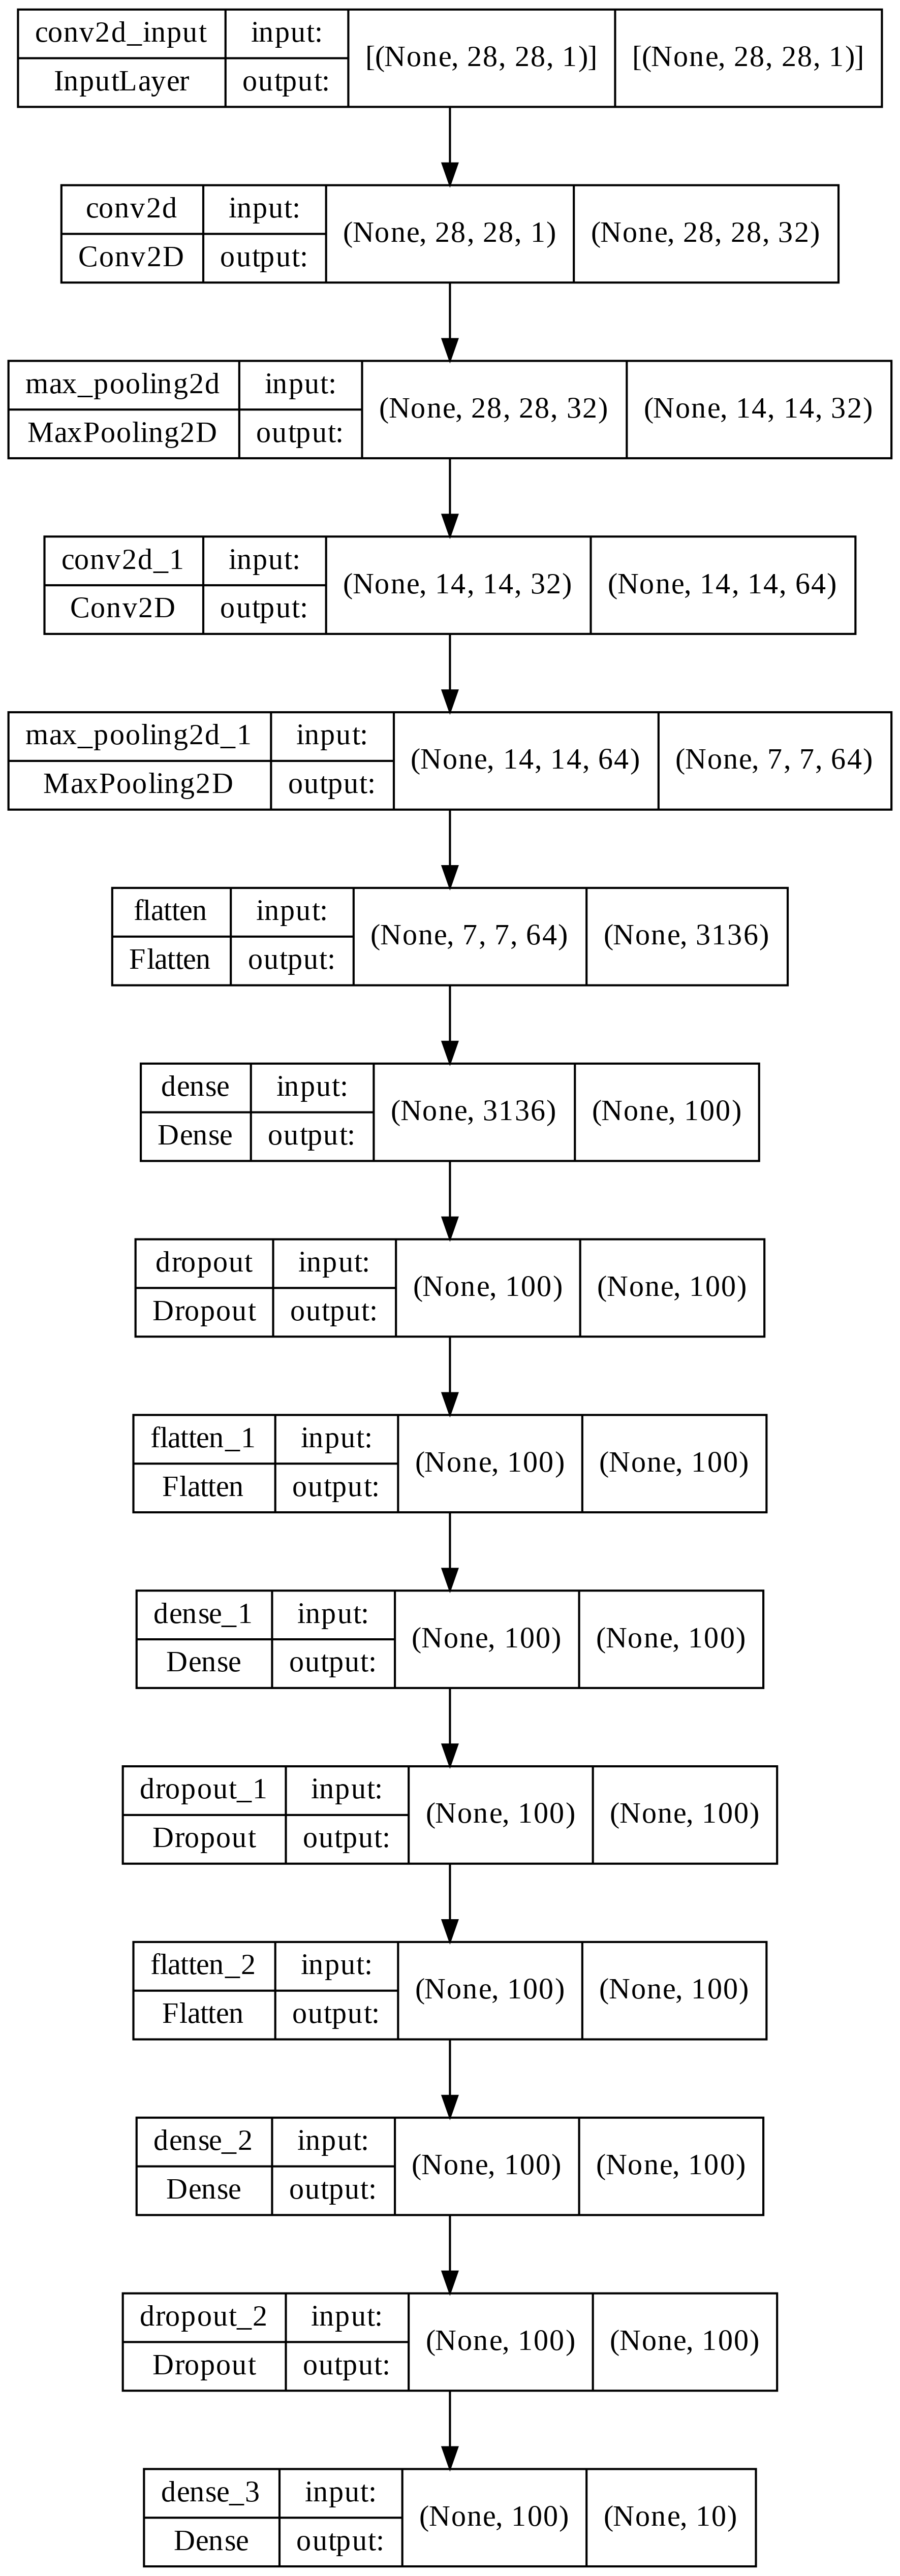

In [11]:
keras.utils.plot_model(model, show_shapes = True, to_file = 'cnn-architecture.png', dpi = 300)

In [13]:
# 모델 컴파일과 훈련
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights= True)
history = model.fit(train_scaled, train_target, epochs = 20, validation_data = (val_scaled, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 59s 39ms/step - loss: 0.7331 - accuracy: 0.7291 - val_loss: 0.4095 - val_accuracy: 0.8562
Epoch 2/20
1500/1500 [==============================] - 58s 39ms/step - loss: 0.4539 - accuracy: 0.8406 - val_loss: 0.3254 - val_accuracy: 0.8839
Epoch 3/20
1500/1500 [==============================] - 59s 39ms/step - loss: 0.3799 - accuracy: 0.8691 - val_loss: 0.2873 - val_accuracy: 0.8928
Epoch 4/20
1500/1500 [==============================] - 59s 39ms/step - loss: 0.3407 - accuracy: 0.8836 - val_loss: 0.2680 - val_accuracy: 0.9047
Epoch 5/20
1500/1500 [==============================] - 59s 39ms/step - loss: 0.3119 - accuracy: 0.8946 - val_loss: 0.2538 - val_accuracy: 0.9103
Epoch 6/20
1500/1500 [==============================] - 59s 39ms/step - loss: 0.2918 - accuracy: 0.9011 - val_loss: 0.2481 - val_accuracy: 0.9105
Epoch 7/20
1500/1500 [==============================] - 59s 39ms/step - loss: 0.2730 - accuracy: 0.9061 - val_loss: 0.2554 -

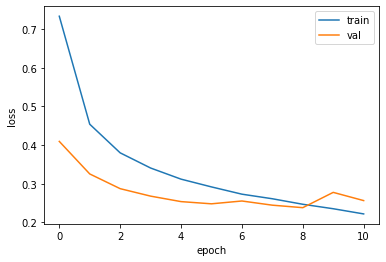

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch');plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [15]:
# EarlyStopping 클래스에서 restore_best_weights 매개변수를 True로 지정했기 때문에
# 현재 model 객체가 최적의 모델 파라미터로 복원되어있다.
# 즉, ModelCheckpoint 콜백이 저장한 best-cnn-model.h5 파일을 다시 읽을 필요가 없다.
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 5s 13ms/step - loss: 0.2381 - accuracy: 0.9177


[0.2381339967250824, 0.9176666736602783]

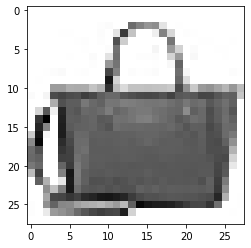

In [16]:
plt.imshow(val_scaled[0].reshape(28,28), cmap = 'gray_r')
plt.show()

In [17]:
preds = model.predict(val_scaled[0:1])
# 배열 슬라이싱은 인덱싱과 다르게 선택된 원소가 하나이더라도 전체 차원이 유지되어 (1,28,28,1)의 크기를 만듭니다.
print(preds)

[[4.3585992e-19 1.2267916e-31 3.2526763e-29 1.0280594e-28 8.4709671e-33
  2.2148035e-27 4.0413817e-24 5.5020603e-25 1.0000000e+00 1.4313090e-22]]


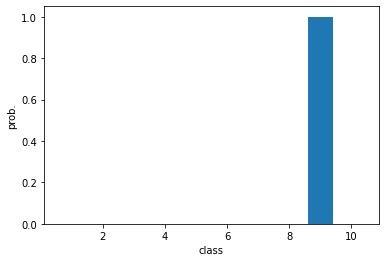

In [18]:
plt.bar(range(1,11),preds[0])
plt.xlabel('class');plt.ylabel('prob.')
plt.show()

In [19]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']
import numpy as np

print(classes[np.argmax(preds)])

가방


In [20]:
# 마지막으로 맨처음에 떼어 놓앗떤 테스트 세트로 합성곱 신경망의 일반화 성능을 가늠해 보자
test_scaled = test_input.reshape(-1,28,28,1) / 255.0
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 5s 16ms/step - loss: 0.2633 - accuracy: 0.9117


[0.26328137516975403, 0.9117000102996826]